In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [103]:
bank_df = pd.read_csv("bank-additional-full.csv", sep=";")
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [104]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Ordinary Logistic Regression

In [330]:
bank_df1 = bank_df.copy()

In [331]:
# Turning All Categorical Attributes to Numeric

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_var =['contact','month','day_of_week','poutcome']
for i in cat_var:
    bank_df1[i]= le.fit_transform(bank_df1[i]) 

bank_df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [332]:
from sklearn.model_selection import train_test_split

X = df1[['contact','month','day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']] # Only numeric values

y = df1['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [333]:
model = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000)

In [346]:
scaler = MinMaxScaler()
columns_to_scale = ['month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
                    'cons.conf.idx', 'euribor3m', 'nr.employed']

In [347]:
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

In [348]:
model.fit(X_train, y_train)

LogisticRegression(C=0.7, max_iter=1000, random_state=42)

In [349]:
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [350]:
predictions = model.predict(X_test)

Confusion Matrix:
[[10815   153]
 [ 1085   304]]

Accuracy: 0.8998138706805859


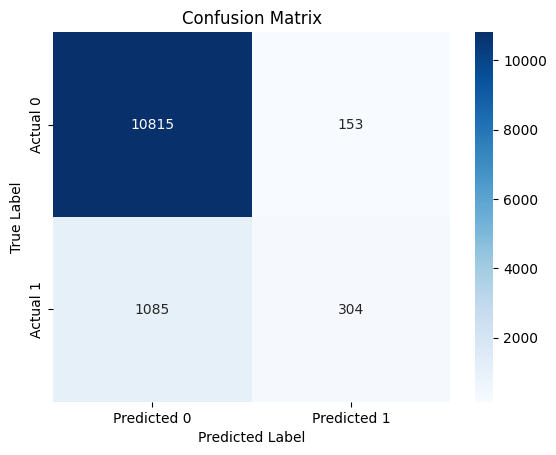

In [351]:
conf_matrix = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"\nAccuracy: {accuracy}")

# Visualize the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Upsampling ~ Balancing data first

In [179]:
df1 = bank_df.copy()

In [180]:
# Turning All Categorical Attributes to Numeric

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_var =['contact','month','day_of_week','poutcome']
for i in cat_var:
    df1[i]= le.fit_transform(df1[i]) 

df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [181]:
from sklearn.model_selection import train_test_split

X = df1[['contact','month','day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']] # Only numeric values

y = df1['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [182]:
X_train

,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
39075,0,2,1,3,999,1,0,-3.0,92.713,-33.0,0.709,5023.5
34855,1,6,0,4,999,0,1,-1.8,92.893,-46.2,1.250,5099.1
7107,1,6,2,2,999,0,1,1.1,93.994,-36.4,4.860,5191.0
31614,0,6,2,1,999,1,0,-1.8,92.893,-46.2,1.327,5099.1
34878,0,6,0,9,999,0,1,-1.8,92.893,-46.2,1.250,5099.1
...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1,6,3,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0
11284,1,4,2,1,999,0,1,1.4,94.465,-41.8,4.961,5228.1
38158,0,8,2,1,4,1,2,-3.4,92.431,-26.9,0.754,5017.5
860,1,6,4,2,999,0,1,1.1,93.994,-36.4,4.856,5191.0


In [183]:
df2 = pd.concat([X_train, y_train], axis=1)
df2

,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
39075,0,2,1,3,999,1,0,-3.0,92.713,-33.0,0.709,5023.5,no
34855,1,6,0,4,999,0,1,-1.8,92.893,-46.2,1.250,5099.1,no
7107,1,6,2,2,999,0,1,1.1,93.994,-36.4,4.860,5191.0,no
31614,0,6,2,1,999,1,0,-1.8,92.893,-46.2,1.327,5099.1,no
34878,0,6,0,9,999,0,1,-1.8,92.893,-46.2,1.250,5099.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1,6,3,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
11284,1,4,2,1,999,0,1,1.4,94.465,-41.8,4.961,5228.1,no
38158,0,8,2,1,4,1,2,-3.4,92.431,-26.9,0.754,5017.5,yes
860,1,6,4,2,999,0,1,1.1,93.994,-36.4,4.856,5191.0,no


In [184]:
df2.y.value_counts()

y
no     25580
yes     3251
Name: count, dtype: int64

In [185]:
y_test.value_counts()

y
no     10968
yes     1389
Name: count, dtype: int64

In [186]:
df_classe_majority = df2[df2.y=='no']
df_classe_minority = df2[df2.y=='yes']

In [187]:
from sklearn.utils import resample
df_classe_minority_upsampled = resample(df_classe_minority, 
                                           replace = True,     
                                           n_samples = df_classe_majority.shape[0],   
                                           random_state = 150) 

In [188]:
df_balanced_data = pd.concat([df_classe_majority, df_classe_minority_upsampled])

In [189]:
df_balanced_data.y.value_counts()

y
no     25580
yes    25580
Name: count, dtype: int64

In [191]:
X_train = df2[['contact','month','day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']]
X_train

,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
39075,0,2,1,3,999,1,0,-3.0,92.713,-33.0,0.709,5023.5
34855,1,6,0,4,999,0,1,-1.8,92.893,-46.2,1.250,5099.1
7107,1,6,2,2,999,0,1,1.1,93.994,-36.4,4.860,5191.0
31614,0,6,2,1,999,1,0,-1.8,92.893,-46.2,1.327,5099.1
34878,0,6,0,9,999,0,1,-1.8,92.893,-46.2,1.250,5099.1
...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1,6,3,2,999,0,1,1.1,93.994,-36.4,4.857,5191.0
11284,1,4,2,1,999,0,1,1.4,94.465,-41.8,4.961,5228.1
38158,0,8,2,1,4,1,2,-3.4,92.431,-26.9,0.754,5017.5
860,1,6,4,2,999,0,1,1.1,93.994,-36.4,4.856,5191.0


In [192]:
y_train = df2['y']
y_train

39075     no
34855     no
7107      no
31614     no
34878     no
        ... 
6265      no
11284     no
38158    yes
860       no
15795     no
Name: y, Length: 28831, dtype: object

In [194]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000)
lr.fit(X_train, y_train.ravel())

lr_predict_test = lr.predict(X_test)

Confusion Matrix:
[[10812   156]
 [ 1085   304]]

Accuracy: 0.8995710933074371


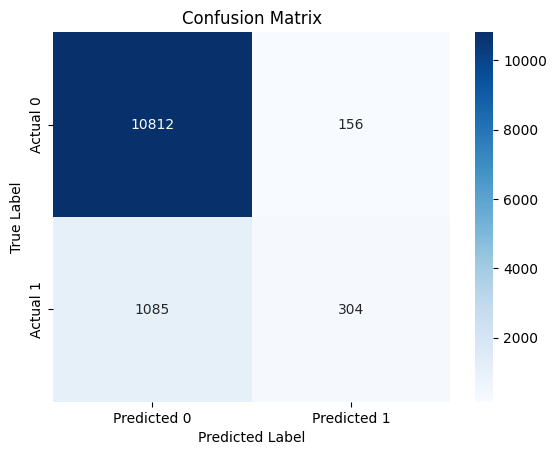

In [195]:
conf_matrix = confusion_matrix(y_test, lr_predict_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test, lr_predict_test)
print(f"\nAccuracy: {accuracy}")

# Visualize the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Balancing and Scaling

In [280]:
from sklearn.preprocessing import StandardScaler

In [281]:
scaler = StandardScaler()
columns_to_scale = ['month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
                    'cons.conf.idx', 'euribor3m', 'nr.employed']

In [282]:
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

C:\Users\azizt\AppData\Local\Temp\ipykernel_24104\58570782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])


In [283]:
lr = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000)
lr.fit(X_train, y_train.ravel())

LogisticRegression(C=0.7, max_iter=1000, random_state=42)

In [284]:
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [285]:
lr_predict_test = lr.predict(X_test)

Confusion Matrix:
[[10812   156]
 [ 1081   308]]

Accuracy: 0.8998947964716355


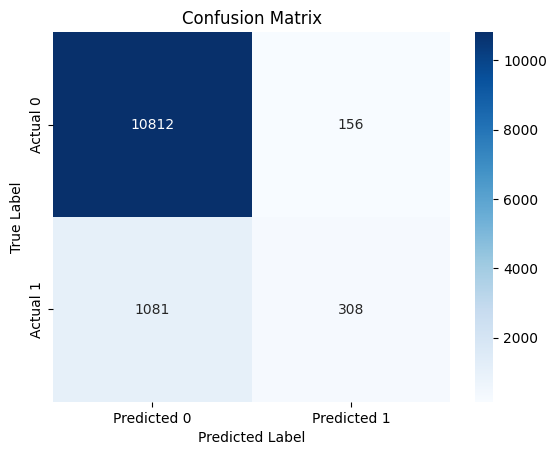

In [286]:
conf_matrix = confusion_matrix(y_test, lr_predict_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test, lr_predict_test)
print(f"\nAccuracy: {accuracy}")

# Visualize the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Changing the classification threshold value

In [287]:
lr = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000, fit_intercept=False)
lr.fit(X_train, y_train.ravel())

LogisticRegression(C=0.7, fit_intercept=False, max_iter=1000, random_state=42)

In [300]:
lr.predict_proba(X_test)[10:23]

array([[0.78411161, 0.21588839],
       [0.78329455, 0.21670545],
       [0.60544354, 0.39455646],
       [0.83631437, 0.16368563],
       [0.61673499, 0.38326501],
       [0.86932646, 0.13067354],
       [0.61637906, 0.38362094],
       [0.65893435, 0.34106565],
       [0.6146721 , 0.3853279 ],
       [0.74582173, 0.25417827],
       [0.62183942, 0.37816058],
       [0.97449802, 0.02550198],
       [0.90046035, 0.09953965]])

In [302]:
lr.predict(X_test)[10:23]

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no'], dtype=object)

In [248]:
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Convert string labels in y_true to integers
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Get predicted probabilities for class 1 on the test set
predicted_probs_class1 = lr.predict_proba(X_test)[:, 1]

# Vary the threshold from 0.1 to 0.9 with a step of 0.01
thresholds = np.arange(0.1, 1, 0.01)

# Initialize variables to store the optimal threshold and corresponding F1 score
optimal_threshold = 0
max_f1_score_class1 = 0

# Iterate through each threshold and calculate the F1 score for class 1
for threshold in thresholds:
    custom_predictions_class1 = (predicted_probs_class1 >= threshold).astype(int)
    f1_class1 = f1_score(y_true_encoded, custom_predictions_class1)
    
    # Update the optimal threshold if a higher F1 score is found
    if f1_class1 > max_f1_score_class1:
        max_f1_score_class1 = f1_class1
        optimal_threshold = threshold

# Display the optimal threshold and corresponding F1 score for class 1
print("Optimal Threshold for Class 1:", optimal_threshold)
print("Max F1 Score for Class 1:", max_f1_score_class1)


Optimal Threshold for Class 1: 0.4099999999999998
Max F1 Score for Class 1: 0.43650485436893205


In [267]:
import pandas as pd

# Assuming model is your trained logistic regression model
# Assuming X_test is your testing data

# Get predicted probabilities for each class on the test set
predicted_probs = lr.predict_proba(X_test)

# Create a DataFrame with the predicted probabilities
probs_df = pd.DataFrame(predicted_probs, columns=['Prob_Class_0', 'Prob_Class_1'], index=X_test.index)

# Join X_test with the new DataFrame along columns
X_test_with_probs = X_test.join(probs_df)

# Display the DataFrame with appended predicted probabilities
X_test_with_probs.head()


,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Prob_Class_0,Prob_Class_1
32884,0,0.764849,-0.718416,-0.572537,0.19335,1.673800,-2.56626,-1.198766,-1.180409,-1.226575,-1.338541,-0.936182,0.869715,0.130285
3169,1,0.764849,-0.004359,-0.209199,0.19335,-0.349144,0.19582,0.647250,0.718902,0.887871,0.713705,0.330682,0.974106,0.025894
32206,0,0.764849,-1.432473,-0.572537,0.19335,1.673800,-2.56626,-1.198766,-1.180409,-1.226575,-1.330473,-0.936182,0.872817,0.127183
9403,1,-0.097796,-1.432473,0.517478,0.19335,-0.349144,0.19582,0.838217,1.531413,-0.277232,0.775370,0.842115,0.891052,0.108948
14020,0,-0.529118,-1.432473,-0.209199,0.19335,-0.349144,0.19582,0.838217,0.587796,-0.471415,0.773065,0.842115,0.616379,0.383621


In [268]:
X_test_with_probs

,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Prob_Class_0,Prob_Class_1
32884,0,0.764849,-0.718416,-0.572537,0.193350,1.673800,-2.566260,-1.198766,-1.180409,-1.226575,-1.338541,-0.936182,0.869715,0.130285
3169,1,0.764849,-0.004359,-0.209199,0.193350,-0.349144,0.195820,0.647250,0.718902,0.887871,0.713705,0.330682,0.974106,0.025894
32206,0,0.764849,-1.432473,-0.572537,0.193350,1.673800,-2.566260,-1.198766,-1.180409,-1.226575,-1.330473,-0.936182,0.872817,0.127183
9403,1,-0.097796,-1.432473,0.517478,0.193350,-0.349144,0.195820,0.838217,1.531413,-0.277232,0.775370,0.842115,0.891052,0.108948
14020,0,-0.529118,-1.432473,-0.209199,0.193350,-0.349144,0.195820,0.838217,0.587796,-0.471415,0.773065,0.842115,0.616379,0.383621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15908,0,-0.529118,-0.718416,-0.209199,0.193350,-0.349144,0.195820,0.838217,0.587796,-0.471415,0.771336,0.842115,0.612961,0.387039
28222,0,-1.823086,0.709698,-0.572537,-5.193674,1.673800,2.957901,-1.198766,-0.866445,-1.420759,-1.249789,-0.936182,0.589155,0.410845
14194,1,-0.529118,-0.718416,-0.209199,0.193350,-0.349144,0.195820,0.838217,0.587796,-0.471415,0.772489,0.842115,0.995126,0.004874
19764,0,-1.391763,-1.432473,0.154139,0.193350,-0.349144,0.195820,0.838217,-0.229891,0.952599,0.774794,0.842115,0.842475,0.157525


In [319]:
X_test_with_probs['predictions'] = ['yes' if each >= 0.41 else 'no' for each in X_test_with_probs['Prob_Class_1']]
X_test_with_probs

,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Prob_Class_0,Prob_Class_1,predictions
32884,0,0.764849,-0.718416,-0.572537,0.193350,1.673800,-2.566260,-1.198766,-1.180409,-1.226575,-1.338541,-0.936182,0.869715,0.130285,no
3169,1,0.764849,-0.004359,-0.209199,0.193350,-0.349144,0.195820,0.647250,0.718902,0.887871,0.713705,0.330682,0.974106,0.025894,no
32206,0,0.764849,-1.432473,-0.572537,0.193350,1.673800,-2.566260,-1.198766,-1.180409,-1.226575,-1.330473,-0.936182,0.872817,0.127183,no
9403,1,-0.097796,-1.432473,0.517478,0.193350,-0.349144,0.195820,0.838217,1.531413,-0.277232,0.775370,0.842115,0.891052,0.108948,no
14020,0,-0.529118,-1.432473,-0.209199,0.193350,-0.349144,0.195820,0.838217,0.587796,-0.471415,0.773065,0.842115,0.616379,0.383621,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15908,0,-0.529118,-0.718416,-0.209199,0.193350,-0.349144,0.195820,0.838217,0.587796,-0.471415,0.771336,0.842115,0.612961,0.387039,no
28222,0,-1.823086,0.709698,-0.572537,-5.193674,1.673800,2.957901,-1.198766,-0.866445,-1.420759,-1.249789,-0.936182,0.589155,0.410845,yes
14194,1,-0.529118,-0.718416,-0.209199,0.193350,-0.349144,0.195820,0.838217,0.587796,-0.471415,0.772489,0.842115,0.995126,0.004874,no
19764,0,-1.391763,-1.432473,0.154139,0.193350,-0.349144,0.195820,0.838217,-0.229891,0.952599,0.774794,0.842115,0.842475,0.157525,no


Confusion Matrix:
[[10344   624]
 [  827   562]]

Accuracy: 0.8825766771870195


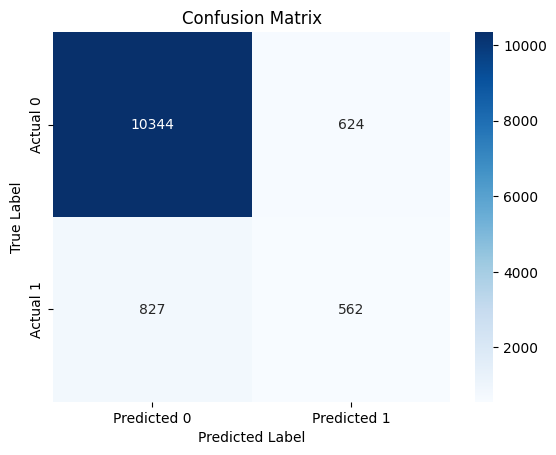

In [320]:
conf_matrix = confusion_matrix(y_test, X_test_with_probs['predictions'])

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test, X_test_with_probs['predictions'])
print(f"\nAccuracy: {accuracy}")

# Visualize the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()